In [45]:
import numpy as np
from matplotlib import pyplot as plt

In [46]:
list_x = np.array([-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3])
list_y = np.array([-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90])

In [47]:
def P(x, a):
    """
    Функция для вычисления полинома
    """
    r = 0
    for i in range(len(a)):
        r += a[i] * x ** i
    return r 

In [48]:
def sigma(x, y, a):
    """
    Функция для вычисления среднеквадратического отклонения 
    """
    s = 0
    for i in range(len(x)):
        s += (P(x[i], a) - y[i]) ** 2
    s /= len(x)
    s = np.sqrt(s)
    return s

In [49]:
def genusys(m: int, x, y) -> tuple[np.ndarray, np.ndarray]:
    C = np.zeros((m + 1, m + 1))
    b = np.zeros(m + 1)
    for i in range(m + 1):
        b[i] = np.sum(y * x ** i)
        for j in range(m + 1):
            C[i, j] = np.sum(x ** (i + j)) 
    return C, b 

In [50]:
a = []
s = []
for i in range(5):
    C, b = genusys(i, list_x, list_y)
    a.append(np.linalg.solve(C, b))
    s.append(sigma(list_x, list_y, a[i]))

In [51]:
for i in range(5):
    print(f"Полином степени {i}:\nКоэффициенты: {a[i]}\nСКО: {s[i]}\n")

Полином степени 0:
Коэффициенты: [0.79066667]
СКО: 2.7377690836802793

Полином степени 1:
Коэффициенты: [-0.6479869   1.46502399]
СКО: 2.038022278809972

Полином степени 2:
Коэффициенты: [-1.25772058 -0.65313865  1.0667959 ]
СКО: 1.458184966971596

Полином степени 3:
Коэффициенты: [ 0.49483598 -0.26983377 -2.01973166  1.01540301]
СКО: 0.09988352857095735

Полином степени 4:
Коэффициенты: [ 0.51184244 -0.33857023 -2.05689291  1.08931365 -0.01872316]
СКО: 0.09559096310796017



In [52]:
x_plot = np.linspace(-1, 3, 100)

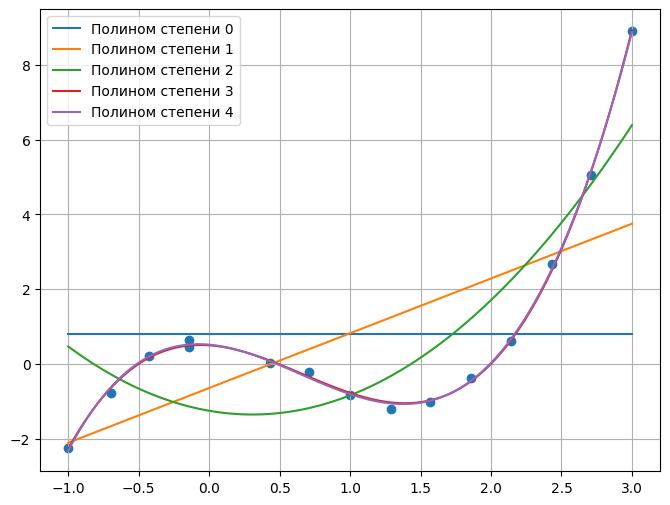

In [53]:
plt.figure(figsize=(8,6))
for i in range(5):
    plt.plot(x_plot, P(x_plot, a[i]), label=f"Полином степени {i}")
plt.scatter(list_x, list_y)
plt.grid()
plt.legend()
plt.show()